# Deep Neural Networks: Application

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
x_train = np.array(train_dataset["train_set_x"][:]) 
y_train = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_catvnoncat.h5', "r")
x_test = np.array(test_dataset["test_set_x"][:]) 
y_test = np.array(test_dataset["test_set_y"][:])

In [3]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
Y_train = np.reshape(y_train,(-1,1))

X_test = np.reshape(x_test, (x_test.shape[0], -1))
Y_test = np.reshape(y_test,(-1,1))

It's not a cat!


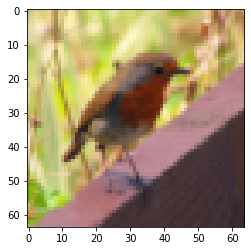

In [4]:
index = 10
plt.imshow(np.reshape(X_train[index,:], (64,64,3)))
print("It's{} a cat!".format((1-Y_train[index,0])*' not'))

In [5]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    threshold = params['threshold']    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: x/255.,
                                     input_shape=[dims[0]]))
    for dim in dims[1:-1]:
        model.add(tf.keras.layers.Dense(units=dim, 
                                        activation='relu', 
                                        kernel_initializer='random_normal', 
                                        bias_initializer='zeros'))
    model.add(tf.keras.layers.Dense(dims[-1], 
                                    activation='sigmoid', 
                                    kernel_initializer='random_normal', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=500,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=1000,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [6]:
model = Model({'dims':[X_train.shape[1], 7, Y_train.shape[1]], 
               'X_train':X_train,
               'Y_train':Y_train,
               'epochs':10000, 
               'learning_rate':0.0075,
               'batch_size':X_train.shape[0],
               'threshold':0.5})

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 86023     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 86,031
Trainable params: 86,031
Non-trainable params: 0
_________________________________________________________________
Train on 209 samples
Epoch 1/10000
209/209 [==============================] - 0s 1ms/sample - loss: 0.6680 - binary_accuracy: 0.6507
Epoch 2/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6670 - binary_accuracy: 0.6507
Epoch 3/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.6660 - binary_accuracy: 0.6507
Epoch 4/10000
209/209 [

Epoch 67/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.6475 - binary_accuracy: 0.6555
Epoch 68/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.6473 - binary_accuracy: 0.6555
Epoch 69/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6471 - binary_accuracy: 0.6555
Epoch 70/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6470 - binary_accuracy: 0.6555
Epoch 71/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6468 - binary_accuracy: 0.6555
Epoch 72/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.6467 - binary_accuracy: 0.6555
Epoch 73/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6465 - binary_accuracy: 0.6555
Epoch 74/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.6464 - binary_accuracy: 0.6555
Epoch 75/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.6462 

Epoch 139/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6348 - binary_accuracy: 0.6555
Epoch 140/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6346 - binary_accuracy: 0.6555
Epoch 141/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.6344 - binary_accuracy: 0.6555
Epoch 142/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.6342 - binary_accuracy: 0.6555
Epoch 143/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.6340 - binary_accuracy: 0.6555
Epoch 144/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.6338 - binary_accuracy: 0.6555
Epoch 145/10000
209/209 [==============================] - 0s 23us/sample - loss: 0.6336 - binary_accuracy: 0.6555
Epoch 146/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.6334 - binary_accuracy: 0.6555
Epoch 147/10000
209/209 [==============================] - 0s 26us/sample - loss

Epoch 211/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6179 - binary_accuracy: 0.6555
Epoch 212/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6176 - binary_accuracy: 0.6555
Epoch 213/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6174 - binary_accuracy: 0.6555
Epoch 214/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6171 - binary_accuracy: 0.6555
Epoch 215/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6168 - binary_accuracy: 0.6555
Epoch 216/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.6165 - binary_accuracy: 0.6555
Epoch 217/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.6162 - binary_accuracy: 0.6555
Epoch 218/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6160 - binary_accuracy: 0.6555
Epoch 219/10000
209/209 [==============================] - 0s 27us/sample - loss

Epoch 283/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.5955 - binary_accuracy: 0.6555
Epoch 284/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5951 - binary_accuracy: 0.6555
Epoch 285/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.5948 - binary_accuracy: 0.6555
Epoch 286/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.5944 - binary_accuracy: 0.6555
Epoch 287/10000
209/209 [==============================] - 0s 24us/sample - loss: 0.5941 - binary_accuracy: 0.6555
Epoch 288/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5937 - binary_accuracy: 0.6555
Epoch 289/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.5934 - binary_accuracy: 0.6555
Epoch 290/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.5930 - binary_accuracy: 0.6555
Epoch 291/10000
209/209 [==============================] - 0s 32us/sample - loss

Epoch 355/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5701 - binary_accuracy: 0.6555
Epoch 356/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.5699 - binary_accuracy: 0.6555
Epoch 357/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5695 - binary_accuracy: 0.6555
Epoch 358/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.5692 - binary_accuracy: 0.6555
Epoch 359/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5689 - binary_accuracy: 0.6555
Epoch 360/10000
209/209 [==============================] - 0s 24us/sample - loss: 0.5685 - binary_accuracy: 0.6555
Epoch 361/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5683 - binary_accuracy: 0.6555
Epoch 362/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5678 - binary_accuracy: 0.6555
Epoch 363/10000
209/209 [==============================] - 0s 30us/sample - loss

Epoch 427/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.5462 - binary_accuracy: 0.6555
Epoch 428/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5458 - binary_accuracy: 0.6555
Epoch 429/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5456 - binary_accuracy: 0.6555
Epoch 430/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5452 - binary_accuracy: 0.6555
Epoch 431/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5448 - binary_accuracy: 0.6555
Epoch 432/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.5444 - binary_accuracy: 0.6555
Epoch 433/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.5442 - binary_accuracy: 0.6555
Epoch 434/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5439 - binary_accuracy: 0.6555
Epoch 435/10000
209/209 [==============================] - 0s 29us/sample - loss

Epoch 499/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.5208 - binary_accuracy: 0.6699
Epoch 500/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.5203 - binary_accuracy: 0.6699
Epoch 501/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.5201 - binary_accuracy: 0.6699
Epoch 502/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5196 - binary_accuracy: 0.6699
Epoch 503/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.5195 - binary_accuracy: 0.6699
Epoch 504/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.5191 - binary_accuracy: 0.6651
Epoch 505/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.5190 - binary_accuracy: 0.6699
Epoch 506/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.5186 - binary_accuracy: 0.6651
Epoch 507/10000
209/209 [==============================] - 0s 35us/sample - loss

Epoch 571/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.4966 - binary_accuracy: 0.6746
Epoch 572/10000
209/209 [==============================] - 0s 24us/sample - loss: 0.4961 - binary_accuracy: 0.6746
Epoch 573/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4961 - binary_accuracy: 0.6746
Epoch 574/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4952 - binary_accuracy: 0.6746
Epoch 575/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.4952 - binary_accuracy: 0.6746
Epoch 576/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4946 - binary_accuracy: 0.6746
Epoch 577/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4946 - binary_accuracy: 0.6746
Epoch 578/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4944 - binary_accuracy: 0.6746
Epoch 579/10000
209/209 [==============================] - 0s 27us/sample - loss

Epoch 643/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.4721 - binary_accuracy: 0.7033
Epoch 644/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4717 - binary_accuracy: 0.7033
Epoch 645/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.4715 - binary_accuracy: 0.7033
Epoch 646/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4716 - binary_accuracy: 0.7081
Epoch 647/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.4716 - binary_accuracy: 0.6986
Epoch 648/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.4723 - binary_accuracy: 0.7081
Epoch 649/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4725 - binary_accuracy: 0.6890
Epoch 650/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.4728 - binary_accuracy: 0.7081
Epoch 651/10000
209/209 [==============================] - 0s 27us/sample - loss

Epoch 715/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4492 - binary_accuracy: 0.7560
Epoch 716/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4490 - binary_accuracy: 0.7656
Epoch 717/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.4481 - binary_accuracy: 0.7560
Epoch 718/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4478 - binary_accuracy: 0.7608
Epoch 719/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.4474 - binary_accuracy: 0.7608
Epoch 720/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4470 - binary_accuracy: 0.7608
Epoch 721/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.4467 - binary_accuracy: 0.7656
Epoch 722/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.4464 - binary_accuracy: 0.7608
Epoch 723/10000
209/209 [==============================] - 0s 30us/sample - loss

Epoch 787/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.4259 - binary_accuracy: 0.7943
Epoch 788/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4254 - binary_accuracy: 0.7703
Epoch 789/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.4251 - binary_accuracy: 0.7943
Epoch 790/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4247 - binary_accuracy: 0.7751
Epoch 791/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.4245 - binary_accuracy: 0.7943
Epoch 792/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.4242 - binary_accuracy: 0.7703
Epoch 793/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4253 - binary_accuracy: 0.8038
Epoch 794/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4268 - binary_accuracy: 0.7512
Epoch 795/10000
209/209 [==============================] - 0s 29us/sample - loss

Epoch 859/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.4141 - binary_accuracy: 0.8278
Epoch 860/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4037 - binary_accuracy: 0.7895
Epoch 861/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4047 - binary_accuracy: 0.8182
Epoch 862/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4082 - binary_accuracy: 0.7608
Epoch 863/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.4146 - binary_accuracy: 0.8325
Epoch 864/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.4018 - binary_accuracy: 0.8182
Epoch 865/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.4014 - binary_accuracy: 0.8182
Epoch 866/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.4015 - binary_accuracy: 0.8086
Epoch 867/10000
209/209 [==============================] - 0s 29us/sample - loss

Epoch 931/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.3827 - binary_accuracy: 0.8565
Epoch 932/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.3854 - binary_accuracy: 0.8086
Epoch 933/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3935 - binary_accuracy: 0.8660
Epoch 934/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.3808 - binary_accuracy: 0.8373
Epoch 935/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3815 - binary_accuracy: 0.8565
Epoch 936/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3854 - binary_accuracy: 0.8086
Epoch 937/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3947 - binary_accuracy: 0.8708
Epoch 938/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.3796 - binary_accuracy: 0.8421
Epoch 939/10000
209/209 [==============================] - 0s 27us/sample - loss

Epoch 1003/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.3720 - binary_accuracy: 0.8852
Epoch 1004/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.3628 - binary_accuracy: 0.8421
Epoch 1005/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.3680 - binary_accuracy: 0.8995
Epoch 1006/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.3639 - binary_accuracy: 0.8325
Epoch 1007/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.3762 - binary_accuracy: 0.8852
Epoch 1008/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.3595 - binary_accuracy: 0.8660
Epoch 1009/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.3597 - binary_accuracy: 0.8756
Epoch 1010/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.3615 - binary_accuracy: 0.8517
Epoch 1011/10000
209/209 [==============================] - 0s 27us/samp

Epoch 1074/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3560 - binary_accuracy: 0.8900
Epoch 1075/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.3414 - binary_accuracy: 0.8756
Epoch 1076/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3441 - binary_accuracy: 0.8995
Epoch 1077/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.3418 - binary_accuracy: 0.8756
Epoch 1078/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.3476 - binary_accuracy: 0.8995
Epoch 1079/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.3432 - binary_accuracy: 0.8708
Epoch 1080/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.3606 - binary_accuracy: 0.8900
Epoch 1081/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3393 - binary_accuracy: 0.8804
Epoch 1082/10000
209/209 [==============================] - 0s 28us/samp

Epoch 1145/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.3353 - binary_accuracy: 0.8995
Epoch 1146/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3232 - binary_accuracy: 0.8852
Epoch 1147/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3330 - binary_accuracy: 0.8995
Epoch 1148/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3250 - binary_accuracy: 0.8756
Epoch 1149/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3416 - binary_accuracy: 0.8947
Epoch 1150/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 1151/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.3208 - binary_accuracy: 0.8852
Epoch 1152/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.3260 - binary_accuracy: 0.9043
Epoch 1153/10000
209/209 [==============================] - 0s 29us/samp

Epoch 1216/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.3040 - binary_accuracy: 0.9043
Epoch 1217/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.3071 - binary_accuracy: 0.9234
Epoch 1218/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.3117 - binary_accuracy: 0.8852
Epoch 1219/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.3331 - binary_accuracy: 0.9187
Epoch 1220/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.3041 - binary_accuracy: 0.9091
Epoch 1221/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.3038 - binary_accuracy: 0.9043
Epoch 1222/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.3145 - binary_accuracy: 0.9139
Epoch 1223/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.3038 - binary_accuracy: 0.8900
Epoch 1224/10000
209/209 [==============================] - 0s 27us/samp

Epoch 1287/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2871 - binary_accuracy: 0.9234
Epoch 1288/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2896 - binary_accuracy: 0.9378
Epoch 1289/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2940 - binary_accuracy: 0.8900
Epoch 1290/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.3174 - binary_accuracy: 0.9378
Epoch 1291/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2871 - binary_accuracy: 0.9234
Epoch 1292/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.2856 - binary_accuracy: 0.9282
Epoch 1293/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.2871 - binary_accuracy: 0.9330
Epoch 1294/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2885 - binary_accuracy: 0.9139
Epoch 1295/10000
209/209 [==============================] - 0s 26us/samp

Epoch 1358/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2707 - binary_accuracy: 0.9378
Epoch 1359/10000
209/209 [==============================] - 0s 43us/sample - loss: 0.2707 - binary_accuracy: 0.9378
Epoch 1360/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2782 - binary_accuracy: 0.9569
Epoch 1361/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.2727 - binary_accuracy: 0.9330
Epoch 1362/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2934 - binary_accuracy: 0.9522
Epoch 1363/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.2701 - binary_accuracy: 0.9330
Epoch 1364/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2705 - binary_accuracy: 0.9426
Epoch 1365/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2877 - binary_accuracy: 0.9522
Epoch 1366/10000
209/209 [==============================] - 0s 36us/samp

Epoch 1429/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2547 - binary_accuracy: 0.9522
Epoch 1430/10000
209/209 [==============================] - 0s 80us/sample - loss: 0.2602 - binary_accuracy: 0.9665
Epoch 1431/10000
209/209 [==============================] - 0s 44us/sample - loss: 0.2628 - binary_accuracy: 0.9330
Epoch 1432/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.2871 - binary_accuracy: 0.9713
Epoch 1433/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2566 - binary_accuracy: 0.9569
Epoch 1434/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2560 - binary_accuracy: 0.9569
Epoch 1435/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.2726 - binary_accuracy: 0.9665
Epoch 1436/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.2537 - binary_accuracy: 0.9474
Epoch 1437/10000
209/209 [==============================] - 0s 30us/samp

Epoch 1500/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.2413 - binary_accuracy: 0.9617
Epoch 1501/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.2405 - binary_accuracy: 0.9665
Epoch 1502/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2492 - binary_accuracy: 0.9809
Epoch 1503/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2407 - binary_accuracy: 0.9569
Epoch 1504/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.2560 - binary_accuracy: 0.9809
Epoch 1505/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2399 - binary_accuracy: 0.9522
Epoch 1506/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.2456 - binary_accuracy: 0.9809
Epoch 1507/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.2460 - binary_accuracy: 0.9522
Epoch 1508/10000
209/209 [==============================] - 0s 47us/samp

Epoch 1571/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2306 - binary_accuracy: 0.9713
Epoch 1572/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.2308 - binary_accuracy: 0.9713
Epoch 1573/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2522 - binary_accuracy: 0.9809
Epoch 1574/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2300 - binary_accuracy: 0.9761
Epoch 1575/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.2302 - binary_accuracy: 0.9713
Epoch 1576/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.2512 - binary_accuracy: 0.9809
Epoch 1577/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2296 - binary_accuracy: 0.9713
Epoch 1578/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2296 - binary_accuracy: 0.9713
Epoch 1579/10000
209/209 [==============================] - 0s 29us/samp

Epoch 1642/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.2194 - binary_accuracy: 0.9809
Epoch 1643/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2163 - binary_accuracy: 0.9761
Epoch 1644/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.2327 - binary_accuracy: 0.9856
Epoch 1645/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.2146 - binary_accuracy: 0.9761
Epoch 1646/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2140 - binary_accuracy: 0.9761
Epoch 1647/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2140 - binary_accuracy: 0.9809
Epoch 1648/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2158 - binary_accuracy: 0.9761
Epoch 1649/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.2320 - binary_accuracy: 0.9856
Epoch 1650/10000
209/209 [==============================] - 0s 37us/samp

Epoch 1713/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2050 - binary_accuracy: 0.9809
Epoch 1714/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.2059 - binary_accuracy: 0.9761
Epoch 1715/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.2275 - binary_accuracy: 0.9856
Epoch 1716/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.2041 - binary_accuracy: 0.9809
Epoch 1717/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.2051 - binary_accuracy: 0.9761
Epoch 1718/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.2266 - binary_accuracy: 0.9856
Epoch 1719/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2042 - binary_accuracy: 0.9809
Epoch 1720/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.2046 - binary_accuracy: 0.9761
Epoch 1721/10000
209/209 [==============================] - 0s 44us/samp

Epoch 1784/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.2223 - binary_accuracy: 0.9856
Epoch 1785/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1969 - binary_accuracy: 0.9856
Epoch 1786/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.1916 - binary_accuracy: 0.9904
Epoch 1787/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.1926 - binary_accuracy: 0.9904
Epoch 1788/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1925 - binary_accuracy: 0.9856
Epoch 1789/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.2062 - binary_accuracy: 0.9904
Epoch 1790/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1912 - binary_accuracy: 0.9904
Epoch 1791/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.1915 - binary_accuracy: 0.9856
Epoch 1792/10000
209/209 [==============================] - 0s 31us/samp

Epoch 1855/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1640 - binary_accuracy: 0.9904
Epoch 1856/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.1629 - binary_accuracy: 0.9904
Epoch 1857/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.1633 - binary_accuracy: 0.9904
Epoch 1858/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.1759 - binary_accuracy: 0.9856
Epoch 1859/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.1628 - binary_accuracy: 0.9904
Epoch 1860/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.1774 - binary_accuracy: 0.9809
Epoch 1861/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1638 - binary_accuracy: 0.9904
Epoch 1862/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1851 - binary_accuracy: 0.9809
Epoch 1863/10000
209/209 [==============================] - 0s 31us/samp

Epoch 1926/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.1441 - binary_accuracy: 0.9809
Epoch 1927/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.1403 - binary_accuracy: 0.9904
Epoch 1928/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1432 - binary_accuracy: 0.9809
Epoch 1929/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.1397 - binary_accuracy: 0.9904
Epoch 1930/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.1424 - binary_accuracy: 0.9809
Epoch 1931/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.1389 - binary_accuracy: 0.9904
Epoch 1932/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.1415 - binary_accuracy: 0.9809
Epoch 1933/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.1383 - binary_accuracy: 0.9904
Epoch 1934/10000
209/209 [==============================] - 0s 29us/samp

Epoch 1997/10000
209/209 [==============================] - 0s 66us/sample - loss: 0.1150 - binary_accuracy: 0.9904
Epoch 1998/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.1148 - binary_accuracy: 0.9904
Epoch 1999/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.1146 - binary_accuracy: 0.9904
Epoch 2000/10000
209/209 [==============================] - 0s 47us/sample - loss: 0.1144 - binary_accuracy: 0.9904
Epoch 2001/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1142 - binary_accuracy: 0.9904
Epoch 2002/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.1140 - binary_accuracy: 0.9904
Epoch 2003/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.1139 - binary_accuracy: 0.9904
Epoch 2004/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.1137 - binary_accuracy: 0.9904
Epoch 2005/10000
209/209 [==============================] - 0s 36us/samp

Epoch 2068/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.1038 - binary_accuracy: 0.9904
Epoch 2069/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1042 - binary_accuracy: 0.9904
Epoch 2070/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.1045 - binary_accuracy: 0.9904
Epoch 2071/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1054 - binary_accuracy: 0.9904
Epoch 2072/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.1033 - binary_accuracy: 0.9904
Epoch 2073/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.1037 - binary_accuracy: 0.9904
Epoch 2074/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.1041 - binary_accuracy: 0.9904
Epoch 2075/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.1050 - binary_accuracy: 0.9904
Epoch 2076/10000
209/209 [==============================] - 0s 30us/samp

Epoch 2139/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0925 - binary_accuracy: 0.9904
Epoch 2140/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0917 - binary_accuracy: 0.9904
Epoch 2141/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0919 - binary_accuracy: 0.9904
Epoch 2142/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0912 - binary_accuracy: 0.9904
Epoch 2143/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0914 - binary_accuracy: 0.9904
Epoch 2144/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0917 - binary_accuracy: 0.9904
Epoch 2145/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0922 - binary_accuracy: 0.9904
Epoch 2146/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0914 - binary_accuracy: 0.9904
Epoch 2147/10000
209/209 [==============================] - 0s 29us/samp

Epoch 2210/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0834 - binary_accuracy: 0.9904
Epoch 2211/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0844 - binary_accuracy: 0.9904
Epoch 2212/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0827 - binary_accuracy: 0.9904
Epoch 2213/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0830 - binary_accuracy: 0.9904
Epoch 2214/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0830 - binary_accuracy: 0.9904
Epoch 2215/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0839 - binary_accuracy: 0.9904
Epoch 2216/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0821 - binary_accuracy: 0.9904
Epoch 2217/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0823 - binary_accuracy: 0.9904
Epoch 2218/10000
209/209 [==============================] - 0s 27us/samp

Epoch 2281/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0776 - binary_accuracy: 0.9904
Epoch 2282/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0768 - binary_accuracy: 0.9952
Epoch 2283/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0770 - binary_accuracy: 0.9904
Epoch 2284/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0760 - binary_accuracy: 0.9952
Epoch 2285/10000
209/209 [==============================] - 0s 24us/sample - loss: 0.0762 - binary_accuracy: 0.9904
Epoch 2286/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0750 - binary_accuracy: 0.9952
Epoch 2287/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0750 - binary_accuracy: 0.9904
Epoch 2288/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0743 - binary_accuracy: 0.9952
Epoch 2289/10000
209/209 [==============================] - 0s 27us/samp

Epoch 2352/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0671 - binary_accuracy: 0.9952
Epoch 2353/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0673 - binary_accuracy: 0.9904
Epoch 2354/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0669 - binary_accuracy: 0.9952
Epoch 2355/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0673 - binary_accuracy: 0.9904
Epoch 2356/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0668 - binary_accuracy: 0.9952
Epoch 2357/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0673 - binary_accuracy: 0.9904
Epoch 2358/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0666 - binary_accuracy: 0.9952
Epoch 2359/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0671 - binary_accuracy: 0.9904
Epoch 2360/10000
209/209 [==============================] - 0s 28us/samp

Epoch 2423/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0605 - binary_accuracy: 0.9952
Epoch 2424/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0604 - binary_accuracy: 0.9952
Epoch 2425/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0604 - binary_accuracy: 0.9952
Epoch 2426/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0603 - binary_accuracy: 0.9952
Epoch 2427/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0605 - binary_accuracy: 0.9952
Epoch 2428/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0604 - binary_accuracy: 0.9952
Epoch 2429/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0607 - binary_accuracy: 0.9952
Epoch 2430/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0604 - binary_accuracy: 0.9952
Epoch 2431/10000
209/209 [==============================] - 0s 30us/samp

Epoch 2494/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0558 - binary_accuracy: 0.9952
Epoch 2495/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0562 - binary_accuracy: 0.9952
Epoch 2496/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0556 - binary_accuracy: 0.9952
Epoch 2497/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0561 - binary_accuracy: 0.9952
Epoch 2498/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0555 - binary_accuracy: 0.9952
Epoch 2499/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0559 - binary_accuracy: 0.9952
Epoch 2500/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0552 - binary_accuracy: 0.9952
Epoch 2501/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0554 - binary_accuracy: 0.9952
Epoch 2502/10000
209/209 [==============================] - 0s 25us/samp

Epoch 2565/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.0507 - binary_accuracy: 0.9952
Epoch 2566/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0505 - binary_accuracy: 0.9952
Epoch 2567/10000
209/209 [==============================] - 0s 44us/sample - loss: 0.0504 - binary_accuracy: 0.9952
Epoch 2568/10000
209/209 [==============================] - 0s 47us/sample - loss: 0.0504 - binary_accuracy: 0.9952
Epoch 2569/10000
209/209 [==============================] - 0s 56us/sample - loss: 0.0503 - binary_accuracy: 0.9952
Epoch 2570/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0502 - binary_accuracy: 0.9952
Epoch 2571/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0501 - binary_accuracy: 0.9952
Epoch 2572/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.0500 - binary_accuracy: 0.9952
Epoch 2573/10000
209/209 [==============================] - 0s 40us/samp

Epoch 2636/10000
209/209 [==============================] - 0s 46us/sample - loss: 0.0464 - binary_accuracy: 0.9952
Epoch 2637/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.0463 - binary_accuracy: 0.9952
Epoch 2638/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0463 - binary_accuracy: 0.9952
Epoch 2639/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0462 - binary_accuracy: 0.9952
Epoch 2640/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0462 - binary_accuracy: 0.9952
Epoch 2641/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0462 - binary_accuracy: 0.9952
Epoch 2642/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0462 - binary_accuracy: 0.9952
Epoch 2643/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0463 - binary_accuracy: 0.9952
Epoch 2644/10000
209/209 [==============================] - 0s 35us/samp

Epoch 2707/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0428 - binary_accuracy: 0.9952
Epoch 2708/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0428 - binary_accuracy: 0.9952
Epoch 2709/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0428 - binary_accuracy: 0.9952
Epoch 2710/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0427 - binary_accuracy: 0.9952
Epoch 2711/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0427 - binary_accuracy: 0.9952
Epoch 2712/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0426 - binary_accuracy: 0.9952
Epoch 2713/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0427 - binary_accuracy: 0.9952
Epoch 2714/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0426 - binary_accuracy: 0.9952
Epoch 2715/10000
209/209 [==============================] - 0s 26us/samp

Epoch 2778/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0398 - binary_accuracy: 1.0000
Epoch 2779/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0397 - binary_accuracy: 0.9952
Epoch 2780/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0396 - binary_accuracy: 1.0000
Epoch 2781/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0395 - binary_accuracy: 0.9952
Epoch 2782/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0395 - binary_accuracy: 1.0000
Epoch 2783/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0394 - binary_accuracy: 0.9952
Epoch 2784/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0394 - binary_accuracy: 0.9952
Epoch 2785/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0393 - binary_accuracy: 0.9952
Epoch 2786/10000
209/209 [==============================] - 0s 27us/samp

Epoch 2849/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 2850/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 2851/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0367 - binary_accuracy: 1.0000
Epoch 2852/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0367 - binary_accuracy: 1.0000
Epoch 2853/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0366 - binary_accuracy: 1.0000
Epoch 2854/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0366 - binary_accuracy: 1.0000
Epoch 2855/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0366 - binary_accuracy: 1.0000
Epoch 2856/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0365 - binary_accuracy: 1.0000
Epoch 2857/10000
209/209 [==============================] - 0s 29us/samp

Epoch 2920/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0343 - binary_accuracy: 1.0000
Epoch 2921/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2922/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2923/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2924/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2925/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2926/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 2927/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 2928/10000
209/209 [==============================] - 0s 31us/samp

Epoch 2991/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0320 - binary_accuracy: 1.0000
Epoch 2992/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0320 - binary_accuracy: 1.0000
Epoch 2993/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0319 - binary_accuracy: 1.0000
Epoch 2994/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0319 - binary_accuracy: 1.0000
Epoch 2995/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0319 - binary_accuracy: 1.0000
Epoch 2996/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0318 - binary_accuracy: 1.0000
Epoch 2997/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0318 - binary_accuracy: 1.0000
Epoch 2998/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0318 - binary_accuracy: 1.0000
Epoch 2999/10000
209/209 [==============================] - 0s 29us/samp

Epoch 3062/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 3063/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0301 - binary_accuracy: 1.0000
Epoch 3064/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 3065/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 3066/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 3067/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 3068/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 3069/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 3070/10000
209/209 [==============================] - 0s 30us/samp

Epoch 3133/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0282 - binary_accuracy: 1.0000
Epoch 3134/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0281 - binary_accuracy: 1.0000
Epoch 3135/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0281 - binary_accuracy: 1.0000
Epoch 3136/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0281 - binary_accuracy: 1.0000
Epoch 3137/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0281 - binary_accuracy: 1.0000
Epoch 3138/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0280 - binary_accuracy: 1.0000
Epoch 3139/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0280 - binary_accuracy: 1.0000
Epoch 3140/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0279 - binary_accuracy: 1.0000
Epoch 3141/10000
209/209 [==============================] - 0s 29us/samp

Epoch 3204/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0265 - binary_accuracy: 1.0000
Epoch 3205/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 3206/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 3207/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 3208/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 3209/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0263 - binary_accuracy: 1.0000
Epoch 3210/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0263 - binary_accuracy: 1.0000
Epoch 3211/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 3212/10000
209/209 [==============================] - 0s 29us/samp

Epoch 3275/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3276/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3277/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3278/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3279/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3280/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3281/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0249 - binary_accuracy: 1.0000
Epoch 3282/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0248 - binary_accuracy: 1.0000
Epoch 3283/10000
209/209 [==============================] - 0s 28us/samp

Epoch 3346/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0236 - binary_accuracy: 1.0000
Epoch 3347/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0235 - binary_accuracy: 1.0000
Epoch 3348/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0236 - binary_accuracy: 1.0000
Epoch 3349/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0235 - binary_accuracy: 1.0000
Epoch 3350/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0236 - binary_accuracy: 1.0000
Epoch 3351/10000
209/209 [==============================] - 0s 24us/sample - loss: 0.0235 - binary_accuracy: 1.0000
Epoch 3352/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0235 - binary_accuracy: 1.0000
Epoch 3353/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0234 - binary_accuracy: 1.0000
Epoch 3354/10000
209/209 [==============================] - 0s 27us/samp

Epoch 3417/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0223 - binary_accuracy: 1.0000
Epoch 3418/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0223 - binary_accuracy: 1.0000
Epoch 3419/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0223 - binary_accuracy: 1.0000
Epoch 3420/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 3421/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0223 - binary_accuracy: 1.0000
Epoch 3422/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 3423/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 3424/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 3425/10000
209/209 [==============================] - 0s 31us/samp

Epoch 3488/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0212 - binary_accuracy: 1.0000
Epoch 3489/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3490/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3491/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3492/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3493/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3494/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3495/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0211 - binary_accuracy: 1.0000
Epoch 3496/10000
209/209 [==============================] - 0s 31us/samp

Epoch 3559/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0201 - binary_accuracy: 1.0000
Epoch 3560/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3561/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3562/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3563/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3564/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3565/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3566/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 3567/10000
209/209 [==============================] - 0s 25us/samp

Epoch 3630/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0191 - binary_accuracy: 1.0000
Epoch 3631/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3632/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3633/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3634/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3635/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3636/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3637/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0190 - binary_accuracy: 1.0000
Epoch 3638/10000
209/209 [==============================] - 0s 31us/samp

Epoch 3701/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3702/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3703/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3704/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3705/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3706/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3707/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3708/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 3709/10000
209/209 [==============================] - 0s 38us/samp

Epoch 3772/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 3773/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 3774/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 3775/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 3776/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 3777/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 3778/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 3779/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 3780/10000
209/209 [==============================] - 0s 29us/samp

Epoch 3843/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3844/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3845/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3846/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3847/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3848/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 3849/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0164 - binary_accuracy: 1.0000
Epoch 3850/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0164 - binary_accuracy: 1.0000
Epoch 3851/10000
209/209 [==============================] - 0s 34us/samp

Epoch 3914/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3915/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3916/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3917/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3918/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3919/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0158 - binary_accuracy: 1.0000
Epoch 3920/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0157 - binary_accuracy: 1.0000
Epoch 3921/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0157 - binary_accuracy: 1.0000
Epoch 3922/10000
209/209 [==============================] - 0s 35us/samp

Epoch 3985/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3986/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3987/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3988/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3989/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3990/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3991/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3992/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0151 - binary_accuracy: 1.0000
Epoch 3993/10000
209/209 [==============================] - 0s 30us/samp

Epoch 4056/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4057/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4058/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4059/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4060/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4061/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4062/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 4063/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0144 - binary_accuracy: 1.0000
Epoch 4064/10000
209/209 [==============================] - 0s 32us/samp

Epoch 4127/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4128/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4129/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4130/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4131/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4132/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4133/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4134/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 4135/10000
209/209 [==============================] - 0s 35us/samp

Epoch 4198/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0134 - binary_accuracy: 1.0000
Epoch 4199/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0134 - binary_accuracy: 1.0000
Epoch 4200/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0134 - binary_accuracy: 1.0000
Epoch 4201/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0134 - binary_accuracy: 1.0000
Epoch 4202/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0133 - binary_accuracy: 1.0000
Epoch 4203/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0133 - binary_accuracy: 1.0000
Epoch 4204/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0133 - binary_accuracy: 1.0000
Epoch 4205/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0133 - binary_accuracy: 1.0000
Epoch 4206/10000
209/209 [==============================] - 0s 31us/samp

Epoch 4269/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0129 - binary_accuracy: 1.0000
Epoch 4270/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0129 - binary_accuracy: 1.0000
Epoch 4271/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4272/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4273/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4274/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4275/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4276/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 4277/10000
209/209 [==============================] - 0s 30us/samp

Epoch 4340/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4341/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4342/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4343/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4344/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4345/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4346/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 4347/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0123 - binary_accuracy: 1.0000
Epoch 4348/10000
209/209 [==============================] - 0s 31us/samp

Epoch 4411/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0120 - binary_accuracy: 1.0000
Epoch 4412/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0120 - binary_accuracy: 1.0000
Epoch 4413/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0120 - binary_accuracy: 1.0000
Epoch 4414/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0119 - binary_accuracy: 1.0000
Epoch 4415/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0119 - binary_accuracy: 1.0000
Epoch 4416/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0119 - binary_accuracy: 1.0000
Epoch 4417/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0119 - binary_accuracy: 1.0000
Epoch 4418/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0119 - binary_accuracy: 1.0000
Epoch 4419/10000
209/209 [==============================] - 0s 27us/samp

Epoch 4482/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4483/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4484/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4485/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4486/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4487/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4488/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4489/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 4490/10000
209/209 [==============================] - 0s 31us/samp

Epoch 4553/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4554/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4555/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4556/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4557/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4558/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4559/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4560/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 4561/10000
209/209 [==============================] - 0s 31us/samp

Epoch 4624/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4625/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4626/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4627/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4628/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4629/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4630/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0107 - binary_accuracy: 1.0000
Epoch 4631/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 4632/10000
209/209 [==============================] - 0s 36us/samp

Epoch 4695/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4696/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4697/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4698/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4699/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4700/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4701/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4702/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 4703/10000
209/209 [==============================] - 0s 29us/samp

Epoch 4766/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4767/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4768/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4769/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4770/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4771/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4772/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4773/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 4774/10000
209/209 [==============================] - 0s 27us/samp

Epoch 4837/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4838/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4839/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4840/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4841/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4842/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4843/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4844/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 4845/10000
209/209 [==============================] - 0s 31us/samp

Epoch 4908/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4909/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4910/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4911/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4912/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4913/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4914/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4915/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0095 - binary_accuracy: 1.0000
Epoch 4916/10000
209/209 [==============================] - 0s 29us/samp

Epoch 4979/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4980/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4981/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4982/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4983/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4984/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4985/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4986/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 4987/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5050/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5051/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5052/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5053/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5054/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5055/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5056/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5057/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0089 - binary_accuracy: 1.0000
Epoch 5058/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5121/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5122/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5123/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5124/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5125/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5126/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5127/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5128/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 5129/10000
209/209 [==============================] - 0s 28us/samp

Epoch 5192/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0085 - binary_accuracy: 1.0000
Epoch 5193/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5194/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5195/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5196/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5197/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5198/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5199/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0084 - binary_accuracy: 1.0000
Epoch 5200/10000
209/209 [==============================] - 0s 32us/samp

Epoch 5263/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5264/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5265/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5266/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5267/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5268/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5269/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5270/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0082 - binary_accuracy: 1.0000
Epoch 5271/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5334/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5335/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5336/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5337/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5338/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5339/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5340/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5341/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 5342/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5405/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5406/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5407/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5408/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5409/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5410/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5411/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5412/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 5413/10000
209/209 [==============================] - 0s 30us/samp

Epoch 5476/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5477/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5478/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5479/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5480/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5481/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5482/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5483/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 5484/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5547/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5548/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5549/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5550/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5551/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5552/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5553/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5554/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 5555/10000
209/209 [==============================] - 0s 35us/samp

Epoch 5618/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5619/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5620/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5621/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5622/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5623/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5624/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5625/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 5626/10000
209/209 [==============================] - 0s 33us/samp

Epoch 5689/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5690/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5691/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5692/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5693/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5694/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5695/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5696/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 5697/10000
209/209 [==============================] - 0s 33us/samp

Epoch 5760/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5761/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5762/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5763/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5764/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5765/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5766/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5767/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 5768/10000
209/209 [==============================] - 0s 33us/samp

Epoch 5831/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5832/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5833/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5834/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5835/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5836/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5837/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5838/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 5839/10000
209/209 [==============================] - 0s 27us/samp

Epoch 5902/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 5903/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 5904/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 5905/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 5906/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 5907/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 5908/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 5909/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 5910/10000
209/209 [==============================] - 0s 30us/samp

Epoch 5973/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5974/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5975/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5976/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5977/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5978/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5979/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5980/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 5981/10000
209/209 [==============================] - 0s 32us/samp

Epoch 6044/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6045/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6046/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6047/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6048/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6049/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6050/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6051/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 6052/10000
209/209 [==============================] - 0s 32us/samp

Epoch 6115/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6116/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6117/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6118/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6119/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6120/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6121/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6122/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 6123/10000
209/209 [==============================] - 0s 32us/samp

Epoch 6186/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6187/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6188/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6189/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6190/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6191/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6192/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6193/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 6194/10000
209/209 [==============================] - 0s 35us/samp

Epoch 6257/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6258/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6259/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6260/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6261/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6262/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6263/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6264/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 6265/10000
209/209 [==============================] - 0s 38us/samp

Epoch 6328/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 6329/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 6330/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 6331/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 6332/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 6333/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 6334/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 6335/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 6336/10000
209/209 [==============================] - 0s 31us/samp

Epoch 6399/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6400/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6401/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6402/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6403/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6404/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6405/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6406/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 6407/10000
209/209 [==============================] - 0s 26us/samp

Epoch 6470/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6471/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6472/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6473/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6474/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6475/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6476/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6477/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6478/10000
209/209 [==============================] - 0s 31us/samp

Epoch 6541/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6542/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6543/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6544/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6545/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6546/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6547/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6548/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 6549/10000
209/209 [==============================] - 0s 28us/samp

Epoch 6612/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6613/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6614/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6615/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6616/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6617/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6618/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6619/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6620/10000
209/209 [==============================] - 0s 27us/samp

Epoch 6683/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6684/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6685/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6686/10000
209/209 [==============================] - 0s 25us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6687/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6688/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6689/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6690/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6691/10000
209/209 [==============================] - 0s 28us/samp

Epoch 6754/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6755/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6756/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6757/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6758/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6759/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6760/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6761/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6762/10000
209/209 [==============================] - 0s 31us/samp

Epoch 6825/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6826/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6827/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6828/10000
209/209 [==============================] - 0s 26us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6829/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6830/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6831/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6832/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6833/10000
209/209 [==============================] - 0s 33us/samp

Epoch 6896/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6897/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6898/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6899/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6900/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6901/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6902/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6903/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6904/10000
209/209 [==============================] - 0s 36us/samp

Epoch 6967/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6968/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6969/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6970/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6971/10000
209/209 [==============================] - 0s 27us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6972/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6973/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6974/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 6975/10000
209/209 [==============================] - 0s 33us/samp

In [7]:
model.evaluate(X_train, Y_train)

209/209 [==============================] - 0s 473us/sample - loss: 0.0054 - binary_accuracy: 1.0000


[0.0053843520225235145, 1.0]

In [8]:
model.evaluate(X_test, Y_test)

50/50 [==============================] - 0s 105us/sample - loss: 1.6351 - binary_accuracy: 0.6800


[1.6351049661636352, 0.68]

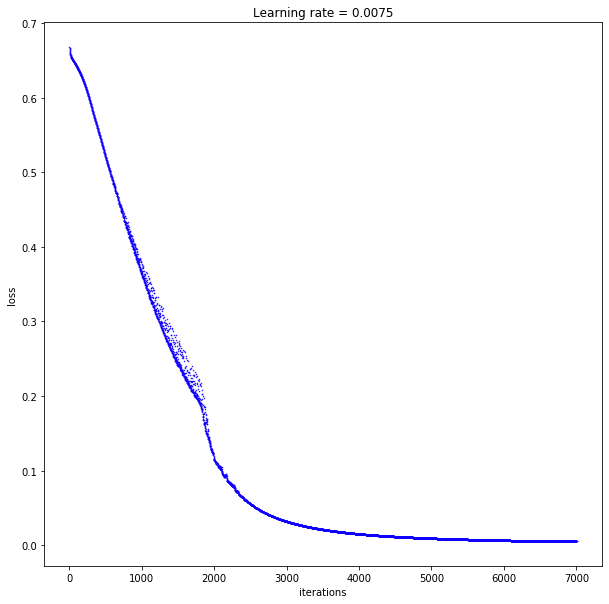

In [9]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0075')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

In [10]:
model = Model({'dims': [X_train.shape[1], 20, 7, 5, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 10000, 
               'learning_rate': 0.0075,
               'batch_size': X_train.shape[0],
               'threshold':0.5})

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                245780    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________
Train on 209 samples
Epoch 1/10000
209/209 [==============================] - 0s 1ms/sample - loss: 0.6933 - binar

Epoch 64/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6830 - binary_accuracy: 0.6555
Epoch 65/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6829 - binary_accuracy: 0.6555
Epoch 66/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6827 - binary_accuracy: 0.6555
Epoch 67/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6826 - binary_accuracy: 0.6555
Epoch 68/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6824 - binary_accuracy: 0.6555
Epoch 69/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6823 - binary_accuracy: 0.6555
Epoch 70/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6822 - binary_accuracy: 0.6555
Epoch 71/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6820 - binary_accuracy: 0.6555
Epoch 72/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6819 

Epoch 136/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6739 - binary_accuracy: 0.6555
Epoch 137/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6738 - binary_accuracy: 0.6555
Epoch 138/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6737 - binary_accuracy: 0.6555
Epoch 139/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6736 - binary_accuracy: 0.6555
Epoch 140/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6735 - binary_accuracy: 0.6555
Epoch 141/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6734 - binary_accuracy: 0.6555
Epoch 142/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6733 - binary_accuracy: 0.6555
Epoch 143/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6732 - binary_accuracy: 0.6555
Epoch 144/10000
209/209 [==============================] - 0s 34us/sample - loss

Epoch 208/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6670 - binary_accuracy: 0.6555
Epoch 209/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6669 - binary_accuracy: 0.6555
Epoch 210/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6669 - binary_accuracy: 0.6555
Epoch 211/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6668 - binary_accuracy: 0.6555
Epoch 212/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6667 - binary_accuracy: 0.6555
Epoch 213/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6666 - binary_accuracy: 0.6555
Epoch 214/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6665 - binary_accuracy: 0.6555
Epoch 215/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6664 - binary_accuracy: 0.6555
Epoch 216/10000
209/209 [==============================] - 0s 35us/sample - loss

Epoch 280/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6617 - binary_accuracy: 0.6555
Epoch 281/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6617 - binary_accuracy: 0.6555
Epoch 282/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.6616 - binary_accuracy: 0.6555
Epoch 283/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6615 - binary_accuracy: 0.6555
Epoch 284/10000
209/209 [==============================] - 0s 28us/sample - loss: 0.6615 - binary_accuracy: 0.6555
Epoch 285/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6614 - binary_accuracy: 0.6555
Epoch 286/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6613 - binary_accuracy: 0.6555
Epoch 287/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6613 - binary_accuracy: 0.6555
Epoch 288/10000
209/209 [==============================] - 0s 30us/sample - loss

Epoch 352/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6577 - binary_accuracy: 0.6555
Epoch 353/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6576 - binary_accuracy: 0.6555
Epoch 354/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6576 - binary_accuracy: 0.6555
Epoch 355/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6575 - binary_accuracy: 0.6555
Epoch 356/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6575 - binary_accuracy: 0.6555
Epoch 357/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6574 - binary_accuracy: 0.6555
Epoch 358/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6574 - binary_accuracy: 0.6555
Epoch 359/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6573 - binary_accuracy: 0.6555
Epoch 360/10000
209/209 [==============================] - 0s 33us/sample - loss

Epoch 424/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6545 - binary_accuracy: 0.6555
Epoch 425/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6545 - binary_accuracy: 0.6555
Epoch 426/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6545 - binary_accuracy: 0.6555
Epoch 427/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6544 - binary_accuracy: 0.6555
Epoch 428/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6544 - binary_accuracy: 0.6555
Epoch 429/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6544 - binary_accuracy: 0.6555
Epoch 430/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6543 - binary_accuracy: 0.6555
Epoch 431/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6543 - binary_accuracy: 0.6555
Epoch 432/10000
209/209 [==============================] - 0s 33us/sample - loss

Epoch 496/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6522 - binary_accuracy: 0.6555
Epoch 497/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6521 - binary_accuracy: 0.6555
Epoch 498/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6521 - binary_accuracy: 0.6555
Epoch 499/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6521 - binary_accuracy: 0.6555
Epoch 500/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6520 - binary_accuracy: 0.6555
Epoch 501/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6520 - binary_accuracy: 0.6555
Epoch 502/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6520 - binary_accuracy: 0.6555
Epoch 503/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6520 - binary_accuracy: 0.6555
Epoch 504/10000
209/209 [==============================] - 0s 36us/sample - loss

Epoch 568/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6503 - binary_accuracy: 0.6555
Epoch 569/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6503 - binary_accuracy: 0.6555
Epoch 570/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6503 - binary_accuracy: 0.6555
Epoch 571/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6502 - binary_accuracy: 0.6555
Epoch 572/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6502 - binary_accuracy: 0.6555
Epoch 573/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6502 - binary_accuracy: 0.6555
Epoch 574/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6502 - binary_accuracy: 0.6555
Epoch 575/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6502 - binary_accuracy: 0.6555
Epoch 576/10000
209/209 [==============================] - 0s 32us/sample - loss

Epoch 640/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6489 - binary_accuracy: 0.6555
Epoch 641/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6489 - binary_accuracy: 0.6555
Epoch 642/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 643/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 644/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 645/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 646/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 647/10000
209/209 [==============================] - 0s 29us/sample - loss: 0.6488 - binary_accuracy: 0.6555
Epoch 648/10000
209/209 [==============================] - 0s 36us/sample - loss

Epoch 712/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6478 - binary_accuracy: 0.6555
Epoch 713/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6478 - binary_accuracy: 0.6555
Epoch 714/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6478 - binary_accuracy: 0.6555
Epoch 715/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6477 - binary_accuracy: 0.6555
Epoch 716/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6477 - binary_accuracy: 0.6555
Epoch 717/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6477 - binary_accuracy: 0.6555
Epoch 718/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6477 - binary_accuracy: 0.6555
Epoch 719/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6477 - binary_accuracy: 0.6555
Epoch 720/10000
209/209 [==============================] - 0s 32us/sample - loss

Epoch 784/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 785/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 786/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 787/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 788/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 789/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 790/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 791/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6469 - binary_accuracy: 0.6555
Epoch 792/10000
209/209 [==============================] - 0s 33us/sample - loss

Epoch 856/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6463 - binary_accuracy: 0.6555
Epoch 857/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6463 - binary_accuracy: 0.6555
Epoch 858/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 859/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 860/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 861/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 862/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 863/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6462 - binary_accuracy: 0.6555
Epoch 864/10000
209/209 [==============================] - 0s 35us/sample - loss

Epoch 928/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 929/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 930/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 931/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 932/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 933/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 934/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 935/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6457 - binary_accuracy: 0.6555
Epoch 936/10000
209/209 [==============================] - 0s 33us/sample - loss

Epoch 1000/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1001/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1002/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1003/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1004/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1005/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1006/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1007/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6453 - binary_accuracy: 0.6555
Epoch 1008/10000
209/209 [==============================] - 0s 36us/samp

Epoch 1071/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1072/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1073/10000
209/209 [==============================] - 0s 45us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1074/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1075/10000
209/209 [==============================] - 0s 48us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1076/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1077/10000
209/209 [==============================] - 0s 53us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1078/10000
209/209 [==============================] - 0s 48us/sample - loss: 0.6450 - binary_accuracy: 0.6555
Epoch 1079/10000
209/209 [==============================] - 0s 42us/samp

Epoch 1142/10000
209/209 [==============================] - 0s 45us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1143/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1144/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1145/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1146/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1147/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1148/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1149/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6448 - binary_accuracy: 0.6555
Epoch 1150/10000
209/209 [==============================] - 0s 37us/samp

Epoch 1213/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1214/10000
209/209 [==============================] - 0s 46us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1215/10000
209/209 [==============================] - 0s 45us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1216/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1217/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1218/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1219/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1220/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6446 - binary_accuracy: 0.6555
Epoch 1221/10000
209/209 [==============================] - 0s 31us/samp

Epoch 1284/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1285/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1286/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1287/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1288/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1289/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1290/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6445 - binary_accuracy: 0.6555
Epoch 1291/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6444 - binary_accuracy: 0.6555
Epoch 1292/10000
209/209 [==============================] - 0s 33us/samp

Epoch 1355/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1356/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1357/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1358/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1359/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1360/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1361/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1362/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1363/10000
209/209 [==============================] - 0s 33us/samp

Epoch 1426/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1427/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1428/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6443 - binary_accuracy: 0.6555
Epoch 1429/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1430/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1431/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1432/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1433/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1434/10000
209/209 [==============================] - 0s 37us/samp

Epoch 1497/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1498/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1499/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1500/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1501/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1502/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1503/10000
209/209 [==============================] - 0s 43us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1504/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6442 - binary_accuracy: 0.6555
Epoch 1505/10000
209/209 [==============================] - 0s 40us/samp

Epoch 1568/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1569/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1570/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1571/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1572/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1573/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1574/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1575/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1576/10000
209/209 [==============================] - 0s 49us/samp

Epoch 1639/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1640/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1641/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1642/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1643/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1644/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1645/10000
209/209 [==============================] - 0s 41us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1646/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6441 - binary_accuracy: 0.6555
Epoch 1647/10000
209/209 [==============================] - 0s 38us/samp

Epoch 1710/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1711/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1712/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1713/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1714/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1715/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1716/10000
209/209 [==============================] - 0s 45us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1717/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1718/10000
209/209 [==============================] - 0s 34us/samp

Epoch 1781/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1782/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1783/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1784/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1785/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1786/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1787/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1788/10000
209/209 [==============================] - 0s 43us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1789/10000
209/209 [==============================] - 0s 39us/samp

Epoch 1852/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1853/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1854/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1855/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1856/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1857/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1858/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1859/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1860/10000
209/209 [==============================] - 0s 35us/samp

Epoch 1923/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1924/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1925/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1926/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1927/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1928/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1929/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1930/10000
209/209 [==============================] - 0s 31us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1931/10000
209/209 [==============================] - 0s 32us/samp

Epoch 1994/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1995/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1996/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1997/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1998/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 1999/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2000/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2001/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2002/10000
209/209 [==============================] - 0s 37us/samp

Epoch 2065/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2066/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2067/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2068/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2069/10000
209/209 [==============================] - 0s 42us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2070/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2071/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2072/10000
209/209 [==============================] - 0s 46us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2073/10000
209/209 [==============================] - 0s 43us/samp

Epoch 2136/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2137/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2138/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2139/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2140/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2141/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2142/10000
209/209 [==============================] - 0s 40us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2143/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2144/10000
209/209 [==============================] - 0s 33us/samp

Epoch 2207/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2208/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6440 - binary_accuracy: 0.6555
Epoch 2209/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2210/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2211/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2212/10000
209/209 [==============================] - 0s 39us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2213/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2214/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2215/10000
209/209 [==============================] - 0s 41us/samp

Epoch 2278/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2279/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2280/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2281/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2282/10000
209/209 [==============================] - 0s 37us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2283/10000
209/209 [==============================] - 0s 30us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2284/10000
209/209 [==============================] - 0s 38us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2285/10000
209/209 [==============================] - 0s 32us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2286/10000
209/209 [==============================] - 0s 33us/samp

Epoch 2349/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2350/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2351/10000
209/209 [==============================] - 0s 35us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2352/10000
209/209 [==============================] - 0s 36us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2353/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2354/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2355/10000
209/209 [==============================] - 0s 33us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2356/10000
209/209 [==============================] - 0s 34us/sample - loss: 0.6439 - binary_accuracy: 0.6555
Epoch 2357/10000
209/209 [==============================] - 0s 36us/samp

In [11]:
model.evaluate(X_train, Y_train)

209/209 [==============================] - 0s 523us/sample - loss: 0.6439 - binary_accuracy: 0.6555


[0.643944988980818, 0.6555024]

In [12]:
model.evaluate(X_test, Y_test)

50/50 [==============================] - 0s 101us/sample - loss: 0.8398 - binary_accuracy: 0.3400


[0.8397817969322204, 0.34]

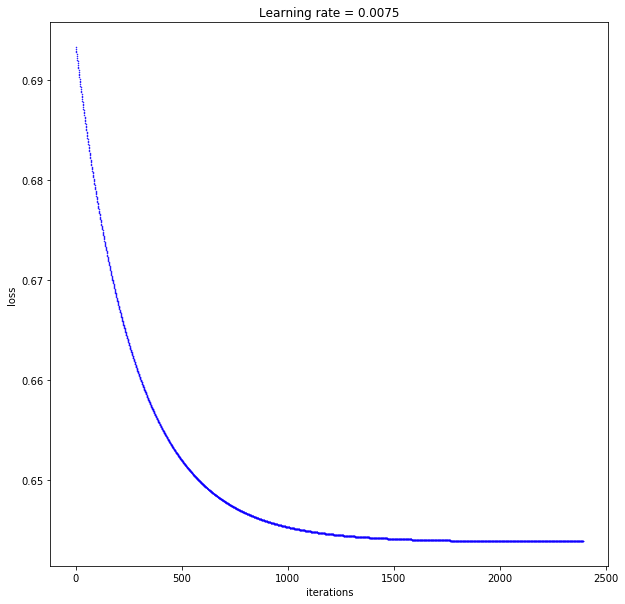

In [13]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0075')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

It's not a cat!


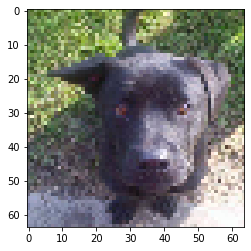

In [14]:
img = np.array(plt.imread("dog.jpg"))
img_ = np.array(Image.fromarray(img).resize((64,64)))
plt.imshow(img_)
img__ = np.reshape(img_,(1,-1))
print("It's{} a cat!".format((1-(model.predict(img__)[0,0]>0.5).astype(int))*' not'))